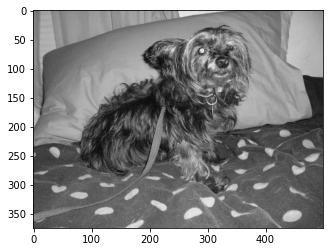

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = r"C:/Users/PC/Desktop/Image_Processing/Task4/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break   

In [2]:
print(img_array.shape)

(375, 500)


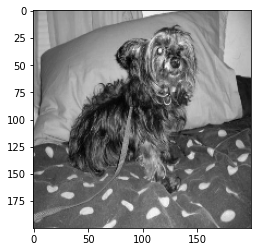

In [3]:
IMG_SIZE = 200       

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #Making all pictures same size
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
print(len(training_data))

24946


In [6]:
#We need to shuffle data to prevent our model to go back and forth with cats and dogs.(Dogs only then after many mistakes cats only)
#We also would want %50-%50 share in binary classification.
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
1
0
0
0
0


In [8]:
X = [] #feature set
y = [] #labels

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #-1 for any number and 1 for grayscale
y = np.array(y)

In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [12]:
X[1]

array([[[144],
        [144],
        [144],
        ...,
        [124],
        [123],
        [122]],

       [[144],
        [144],
        [144],
        ...,
        [122],
        [123],
        [123]],

       [[144],
        [144],
        [144],
        ...,
        [122],
        [124],
        [123]],

       ...,

       [[153],
        [153],
        [155],
        ...,
        [ 17],
        [ 19],
        [ 19]],

       [[154],
        [153],
        [155],
        ...,
        [ 15],
        [ 16],
        [ 16]],

       [[155],
        [153],
        [153],
        ...,
        [ 17],
        [ 16],
        [ 16]]], dtype=uint8)